<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regularization-Techniques" data-toc-modified-id="Regularization-Techniques-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regularization Techniques</a></span><ul class="toc-item"><li><span><a href="#L2-Regularization" data-toc-modified-id="L2-Regularization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>L2 Regularization</a></span><ul class="toc-item"><li><span><a href="#Non-regularized-model" data-toc-modified-id="Non-regularized-model-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Non-regularized model</a></span></li><li><span><a href="#L2-Regularization" data-toc-modified-id="L2-Regularization-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>L2 Regularization</a></span></li></ul></li></ul></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dropout</a></span><ul class="toc-item"><li><span><a href="#Forward-propagation" data-toc-modified-id="Forward-propagation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Forward propagation</a></span></li><li><span><a href="#Backward-propagation" data-toc-modified-id="Backward-propagation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Backward propagation</a></span></li></ul></li></ul></div>

# Regularization Techniques
One of the most common problem data science professionals face is to avoid overfitting. Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.

L2 & L1 regularization
L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term.

Cost function = Loss (say, binary cross entropy) + Regularization term

Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent.

However, this regularization term differs in L1 and L2.




## L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

**Exercise**: Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [19]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from functions_reg import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from functions_reg import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

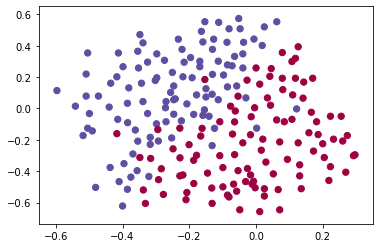

In [20]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

The main goal is to identify a model to separate two colors. We initially use the Non-regulazied model and then we regularize it.

In [22]:
# cost without regularization

def compute_cost(a3, Y):

    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost


# cost with regularization

def compute_cost_with_regularization(a3, Y, parameters, lambd ):

    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(a3, Y) # This gives you the cross-entropy part of the cost   
    L2_regularization_cost = (1. / m)*(lambd / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    
    cost = cross_entropy_cost + L2_regularization_cost


    return cost

In [50]:
def backward_propagation(X, Y, cache):

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
 
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    
    dW3 = 1./m * (np.dot(dZ3, A2.T) + lambd * W3) 
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    
    dW2 = 1./m * (np.dot(dZ2, A1.T) + lambd * W2 )
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * (np.dot(dZ1, X.T) + lambd * W1 )
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

### Non-regularized model

In [8]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):

    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.163299875257242
Cost after iteration 20000: 0.13851642423257143


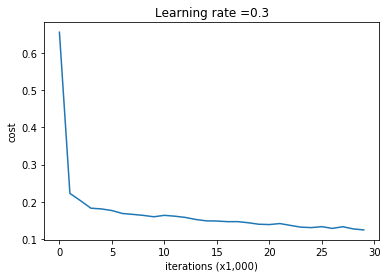

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [9]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

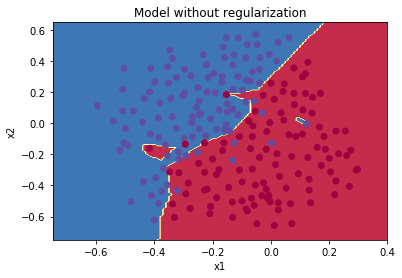

In [10]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### L2 Regularization

Cost after iteration 0: 0.7034066203081302
Cost after iteration 10000: 0.27390924910589476
Cost after iteration 20000: 0.2736763562500149


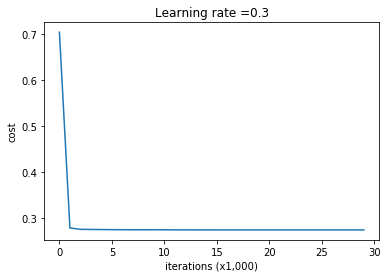

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.935


In [17]:
parameters = model(train_X, train_Y, lambd = 0.8)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

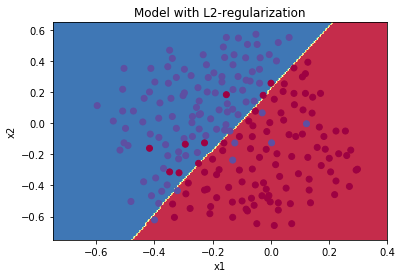

In [18]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Now we have a new hyperparameter that we should optimize $\lambda$.
L2 regularization and modifies the decision boundary and make it smoother with higher $\lambda$ values. This model rely on the face that a model with larger weights are more complicated than large weights. 

# Dropout

The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 

## Forward propagation
Here, we will use the dropout model for the first and second hidden layers. We do not apply it for input and output layers.

In [39]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    np.random.seed(1)
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    d1 = np.random.rand(a1.shape[0],a1.shape[1])
    d1 = d1 < keep_prob
    a1 = np.multiply(a1, d1)
    a1 /= keep_prob   # Scale the value of neurons that haven't been shut

    
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)

    d2 = np.random.rand(a2.shape[0],a2.shape[1])
    d2 = d2 < keep_prob
    a2 = np.multiply(a2, d2)
    a2/= keep_prob   # Scale the value of neurons that haven't been shut
    
    
    
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, d1, a1, W1, b1, z2, d2, a2,  W2, b2, z3, a3, W3, b3)
    
    return a3, cache


## Backward propagation

In [44]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):

    m = X.shape[1]
    (z1, d1, a1, W1, b1, z2, d2, a2,  W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    da2 = np.multiply(da2, d2)
    da2/= keep_prob
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    da1 = np.multiply(da1, d1)
    da1/= keep_prob    
    
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 0.6578204856152704


C:\Users\Hamid\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Hamid\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Cost after iteration 10000: 0.09912090948702691
Cost after iteration 20000: 0.09874684486916817


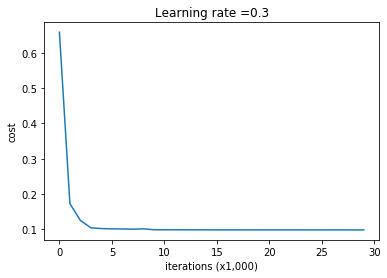

On the train set:
Accuracy: 0.919431279620853
On the test set:
Accuracy: 0.93


In [48]:
parameters = model(train_X, train_Y, keep_prob = 0.75, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

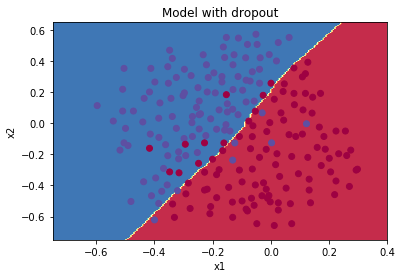

In [49]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

It sholud be important that dropout is a  regularization technique which should be used for the traning. We should not use it for the testing.